# Project: Investigate a Dataset (no-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
> This notebook try to study the resons behind this problem.
>

## Data description
> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row
>
## Questions

> 1. What is the percentage of no show up to show up?!
>
> 2. What is the Value counts for each categorical column?!
>
> 3. What is the distribution of numerical columns?!
>

> 4. What is the % of (Gender, Age, Neighbourhood, Scholarship, Hipertension, Diabetes,  Alcoholism, Handcap, SMS_received) which did not showed up?!
`(the relationship between each column and the  no show up status)`
>

> 5. For each showed up status, what is average period between the appointment and the schedule day?!
>

> 6. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? `(The majority features combination which did not show up)`




In [1]:
# Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling

> * Data reading
> * Data cleaning
> * Data preprocessing

### Data reading

In [2]:
# Read the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Print the first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Select the columns to calculate the correlation between them
columns = list(df.columns)

# Remove the insignificant columns
columns.remove('PatientId')
columns.remove('AppointmentID')

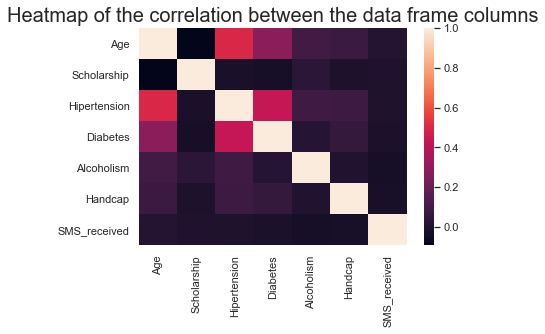

In [4]:
# Draw the heatmap of the correlation between the data frame columns
corr = df[columns].corr()
sns.heatmap(corr);
plt.title('Heatmap of the correlation between the data frame columns', fontdict = {'fontsize': 20});
plt.show()

In [5]:
# # Specify the predictors
# sns.pairplot(data = df,x_vars=columns, y_vars=columns, hue = 'No-show', diag_kind = 'hist')

In [6]:
# Explore the shape of the data
df.shape

(110527, 14)

In [7]:
# Explore the columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

Here, we will investigate our dataset by answering the following questions:
> 1. Are the columns data types correct?
>
> 2. Are there any insignificant columns to drop?'
>
> 3. Is it have a missing values?
>
> 4. Is it contains duplicates?
>
> 5. Are the values of numerical columns correct?!
>
> Are there any column which need to be renamed?!

Then we will deal with the dataset if any of these problems exist

### As we see from the data types of the columns, some of them need to be converted.

a) Conversion from `string` to `date time` format:
> 1. ScheduledDay column
>
> 2. AppointmentDay column

b) Conversion from `int` to `string` format:
> 1. Scholarship column
>
> 2. Hipertension column
>
> 3. Diabetes column
>
> 4. Alcoholism column
>
> 5. Handcap column
>
> 6. SMS_received column

In [8]:
# Conversion from string to date time format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
# Conversion from int to string format
# 1. Create a dictionary to replace the 0 with NO, and 1 with YES
dict_map = {0: 'No', 1: 'Yes'}

# 2. Apply the map function to convert the columns data type
df['Scholarship'] = df['Scholarship'].map(dict_map)
df['Hipertension'] = df['Hipertension'].map(dict_map)
df['Diabetes'] = df['Diabetes'].map(dict_map)
df['Alcoholism'] = df['Alcoholism'].map(dict_map)
df['Handcap'] = df['Handcap'].map(dict_map)
df['SMS_received'] = df['SMS_received'].map(dict_map)

### There is no need for these columns:
> 1. `PatientId` 
> 2. `AppointmentID` 

### so we will drop them

In [10]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [11]:
# Check the previous updates
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,No,No,No


In [12]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  object             
 6   Hipertension    110527 non-null  object             
 7   Diabetes        110527 non-null  object             
 8   Alcoholism      110527 non-null  object             
 9   Handcap         110328 non-null  object             
 10  SMS_received    110527 non-null  object             
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(1), object(9)
memory usage: 10.1+ MB


### Investigating missing values and duplicates

In [13]:
# Count the missing values in each column
df.isnull().sum()

Gender              0
ScheduledDay        0
AppointmentDay      0
Age                 0
Neighbourhood       0
Scholarship         0
Hipertension        0
Diabetes            0
Alcoholism          0
Handcap           199
SMS_received        0
No-show             0
dtype: int64

### As we see, we have `199 null values` in the handcap column. so `we will remove them`.
<font color = red>Note:</font> Removing the nulls in this case will not affect badly on the dataset `(we have about 110500 record)`.

In [14]:
# Drop the missing values
df.dropna(inplace = True)

In [15]:
# Count the missing again in each column
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [16]:
# Count the duplicates
df.duplicated().sum()

632

### As we see, we have `632 duplicates`. so `we will remove them`.

<font color = red>Note:</font> Removing the duplicates in this case will not affect badly on the dataset `(we have about 110500 record)`. 

In [17]:
# Drop the duplicate values
df.drop_duplicates(inplace = True)

In [18]:
# Count the duplicates again
df.duplicated().sum()

0

### Check the values of Age column

In [19]:
# Print the min and the max values of the age
print("The min value is: ", df['Age'].min())
print("The max value is: ", df['Age'].max())

The min value is:  -1
The max value is:  115


In [20]:
# Discover the rows with age == -1
df.query('Age == -1').index

Int64Index([99832], dtype='int64')

In [21]:
# Drop the columns with age == -1
df.drop(df.query('Age == -1').index, inplace = True)

In [22]:
# Check the rows with age == -1
df.query('Age == -1').index

Int64Index([], dtype='int64')

### Rename the no-show column

In [23]:
# rename the No-show column so we can use it with the query function
df.rename(columns= {'No-show': 'No_show'}, inplace = True)

# <font color = yellow> Now, we can say that we have a clean dataset.  </font>

# Needed functions

In [24]:
def plot_df(df, col_list, kind='bar', messege=''):
    '''
        plot the value counts for a given list of columns in a data frame

        Parameters:
        df : The main data frame
        col_list : Columns of interest
        kind : The type of plot
        messege : A messege to print 
        
        Returns:
        no return
    '''
    print(messege, end='\n\n')
    # plot the value counts for the categorical columns
    for col in col_list:
        df[col].value_counts().plot(kind=kind, 
                                    title = col + " value counts",
                                    xlabel = col , ylabel = 'Counts')  
        plt.show()

In [25]:
def plot_df_percent(df, col_list, n = 1, query = None, kind='bar', messege = ''):
    '''
        plot and print the value counts for a given list of columns in a data frame

        Parameters:
        df : The main data frame
        col_list : Columns of interest
        kind : The type of plot
        messege : A messege to print 
        n : total number of observations
        query : a 
        
        Returns:
        no return
    '''
       
    # Calculate the percentage of each value in the columns
    print(messege, end = '\n\n')
    
    if query:
        for col in col_list:
            no_show_df = df.query(query)[col].value_counts() / n
            print(no_show_df, end = '\n')
            print('='*50, end = '\n\n')
            no_show_df.plot(kind=kind, title = col + " percentage",
                                        xlabel = col , ylabel = 'percent (%)')
            plt.show()
        
    else:
        for col in col_list:
            percent = df[col].value_counts() / df.shape[0]
            print(percent, end = '\n')
            print('='*50, end = '\n\n')
            percent.plot(kind=kind, title = col + " percentage",
                                        xlabel = col , ylabel = 'percent (%)')
            plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will try to answere these questions:
> 1. What is the percentage of no show up to show up?!
>
> 2. What is the Value counts for each categorical column?!
>
> 3. What is the distribution of numerical columns?!
>

> 4. What is the % of (Gender, Age, Neighbourhood, Scholarship, Hipertension, Diabetes,  Alcoholism, Handcap, SMS_received) which did not showed up?!
`(the relationship between each column and the  no show up status)`
>

> 5. For each showed up status, what is average period between the appointment and the schedule day?!
>

> 6. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? `(The majority features combination which did not show up)`

### Research Question 1:
### What is the percentage of no show up to show up?!

The % of show, no show

No     0.798924
Yes    0.201076
Name: No_show, dtype: float64



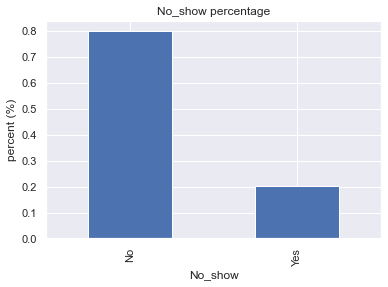

In [26]:
# plot the show, no show percent
plot_df_percent(df, ['No_show'], messege = 'The % of show, no show')

### Conclusion:
> 1. about `20%` of the data did not show up.
>
> 2. about `80%` of the data showed up.

as we see, 20 % of our patientst did not show up. We will discover the reasons behind this with the followiing questions.

### Research Question 2:
### What is the Value counts for each categorical column?!

In [27]:
# Create a list of categorical columns
cat_columns = [col_name for col_name in df.columns if df[col_name].dtype == 'object']

# Remove the Neighbourhood column from this list
cat_columns.remove('Neighbourhood')

In [28]:
# # plot the value counts for the categorical columns    
# plot_df(df, cat_columns, messege= 'The value counts for the categorical columns')

The % of each value in the categorical columns

F    0.650057
M    0.349943
Name: Gender, dtype: float64



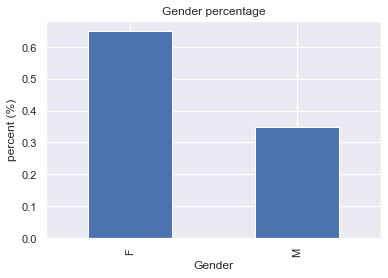

No     0.9017
Yes    0.0983
Name: Scholarship, dtype: float64



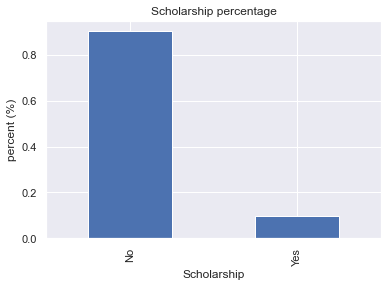

No     0.803172
Yes    0.196828
Name: Hipertension, dtype: float64



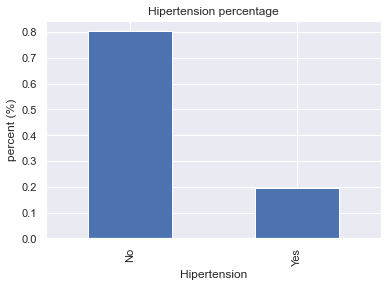

No     0.928438
Yes    0.071562
Name: Diabetes, dtype: float64



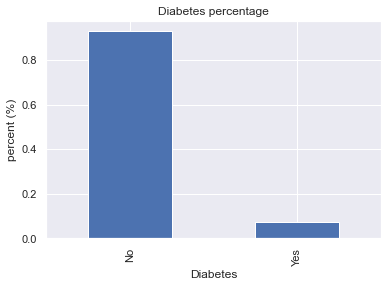

No     0.96957
Yes    0.03043
Name: Alcoholism, dtype: float64



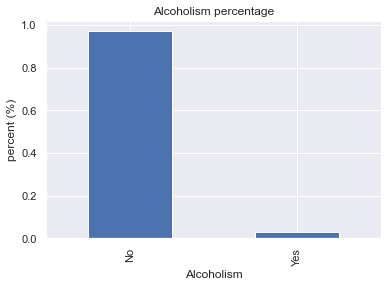

No     0.981558
Yes    0.018442
Name: Handcap, dtype: float64



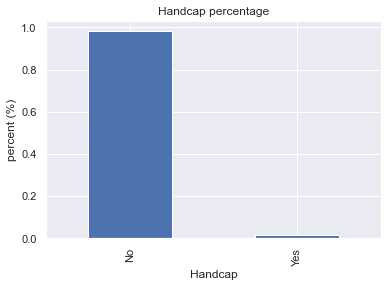

No     0.676968
Yes    0.323032
Name: SMS_received, dtype: float64



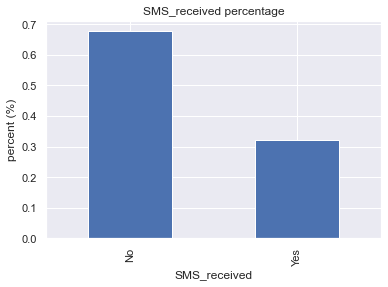

No     0.798924
Yes    0.201076
Name: No_show, dtype: float64



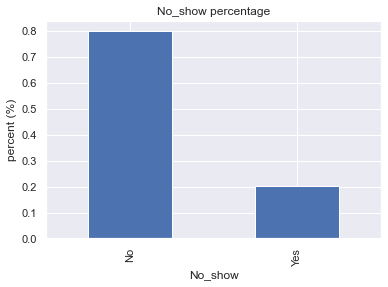

In [29]:
# Calculate the percentage of each value in the columns
plot_df_percent(df, cat_columns, messege = 'The % of each value in the categorical columns')

### Conclusion:
> 1. about `65%` of the patients are females.
>
> 2. about `90%` of the patients has no scholarship.
>
> 3. about `80%` of the patients has no hipertension.
>
> 4. about `92%` of the patients has no diabetes.
>
> 5. about `96%` of the patients has no alcoholism.
> 
> 6. about `98%` of the patients has no handcap.
>
> 7. about `67%` of the patients did not receive an SMS.
> 
> 8. about `20%` of the patients did not show up.

AS we see, the majority of the patients are females, did not recieve SMS, and has no cronic diseases.

### Research Question 3:
### What is the distribution of numerical columns?!

In [30]:
# !pip uninstall jedi --yes

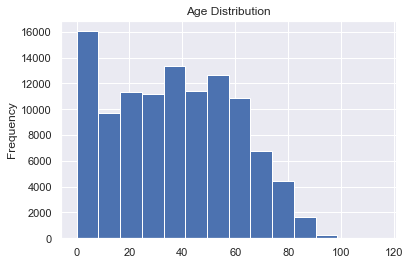

In [31]:
# we have only one numerical column which is 'Age'
# so We will plot it's distribution
df['Age'].plot(kind='hist', bins=14, title='Age Distribution');

### Conclusion:
> As we see, we have a right skewed data. This means that the majority are young people.

### Research Question 4:
### The relationship between each column and the no show up status)

In [32]:
# Create a list of the data frame columnd
columns = list(df.columns)

In [33]:
# Remove the unrequired columns
columns.remove('ScheduledDay')
columns.remove('AppointmentDay')
columns.remove('Age')
columns.remove('Neighbourhood')
columns.remove('No_show')

In [34]:
# Calculate the total number of no show up
total_no_show = df.query('No_show == "Yes"').shape[0]
total_no_show

22057

The % of columns which did not show up:

F    0.654169
M    0.345831
Name: Gender, dtype: float64



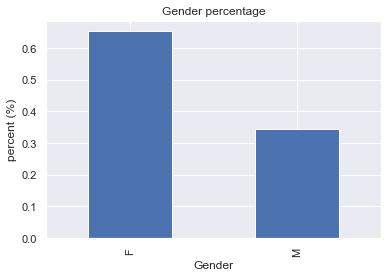

No     0.884164
Yes    0.115836
Name: Scholarship, dtype: float64



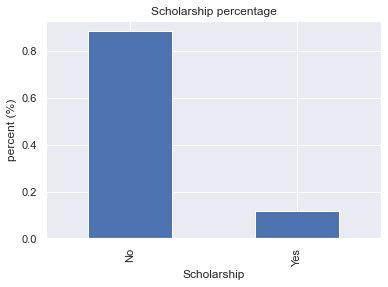

No     0.832071
Yes    0.167929
Name: Hipertension, dtype: float64



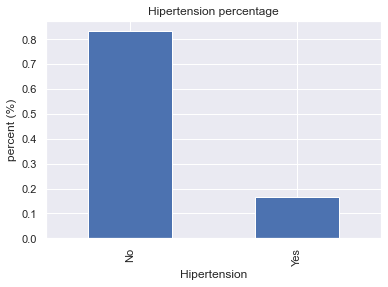

No     0.935893
Yes    0.064107
Name: Diabetes, dtype: float64



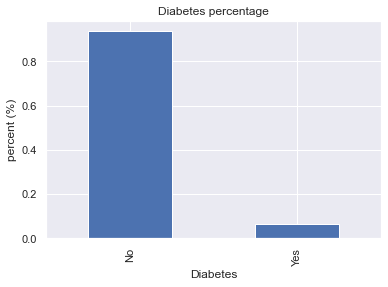

No     0.969806
Yes    0.030194
Name: Alcoholism, dtype: float64



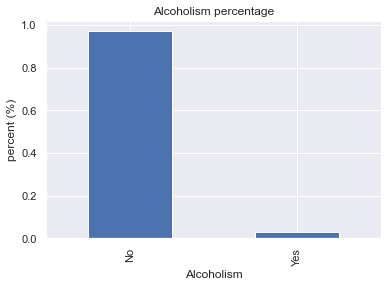

No     0.983769
Yes    0.016231
Name: Handcap, dtype: float64



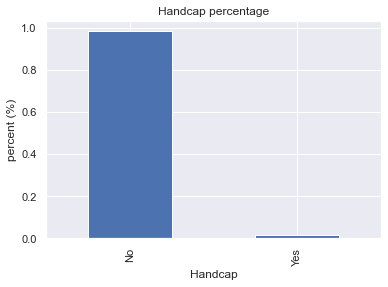

No     0.55683
Yes    0.44317
Name: SMS_received, dtype: float64



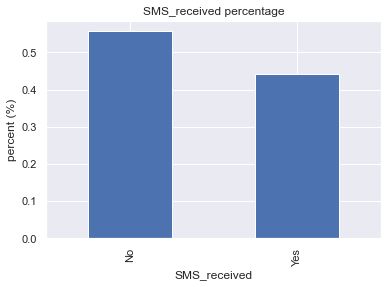

In [35]:
# print the % of each column which did not show up 
plot_df_percent(df, columns, n = total_no_show,
                query='No_show == "Yes"',
                messege='The % of columns which did not show up:')

### Conclusion:
> 1. about `65%` of no show up are `females`.
>
> 2. about `34%` of no show up are `males`.
>
> 3. about `88%` of no show up has `no scholarship`.
>
> 4. about `11%` of no show up has `scholarship`.
>
> 5. about `83%` of no show up has `no hipertension`.
>
> 6. about `16%` of no show up has `hipertension`.
>
> 7. about `93%` of no show up has `no diabetes`.
>
> 8. about `6%` of no show up has `diabetes`.
>
> 9. about `96%` of no show up has `no alcoholism`.
>
> 10. about `3%` of no show up has `alcoholism`.
>
> 11. about `98%` of no show up has `no handcap`.
>
> 12. about `1%` of no show up has `handcap`.
>
> 13. about `55%` of no show `did not receive SMS`.
>
> 14. about `44%` of no show `received SMS`.

### we can deduce that not showing up depends the most on these parameters:

The patients has no handcap, no alcoholism, no diabetes, and no scholarship and they are females.

`so we can say that the patients who has no cronic disease did not show up.`



### Research Question 5:
### For each showed up status, what is average period between the appointment and the schedule day?!



In [36]:
# Create a column for the difference between the schedule and the appointment day
df['date_diff'] = df['AppointmentDay'] - df['ScheduledDay']

In [37]:
# Calculate the mean interval for no show up
df.query('No_show == "Yes"')['date_diff'].mean()

Timedelta('15 days 07:47:57.308518838')

In [38]:
# Calculate the mean interval for showing up
df.query('No_show == "No"')['date_diff'].mean()

Timedelta('8 days 06:34:28.281590182')

### Conclusion:
> As we see, the majority did not show up because the average time interval between the schedule day and the appointment day is large about `15 days`.

> This is unlike the average time interval of the people who showed up, which about about `8 days`

### Research Question 6:
### The majority features combination which did not show up



In [39]:
# Create a data frame of no show up
no_show_df = df.query('No_show == "Yes"')

In [40]:
# Find the index of these features combination which related to no show up
no_show_df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
            'SMS_received', 'Scholarship']].duplicated()

6         False
7          True
11        False
17        False
20         True
          ...  
110484     True
110492     True
110496     True
110515     True
110516     True
Length: 22057, dtype: bool

In [41]:
# Find the count of these records
no_show_df.duplicated(subset = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
                                'SMS_received', 'Scholarship']).sum()

22006

In [42]:
# Calculate the % of these records
no_show_df.duplicated(subset = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
                                'SMS_received', 'Scholarship'])\
                                            .sum() / no_show_df.shape[0]

0.9976878088588657

In [43]:
# Discover the values of one of these records
display(df.iloc[7])

Gender                                    F
ScheduledDay      2016-04-27 15:39:58+00:00
AppointmentDay    2016-04-29 00:00:00+00:00
Age                                      39
Neighbourhood                    GOIABEIRAS
Scholarship                              No
Hipertension                             No
Diabetes                                 No
Alcoholism                               No
Handcap                                  No
SMS_received                             No
No_show                                 Yes
date_diff                   1 days 08:20:02
Name: 7, dtype: object

### Conclusion:
AS we see, the majority which did not show up has:
> 1. no Hipertension
> 
> 2. no Diabetes
> 
> 3. no Alcoholism
> 
> 4. no Handcap
>
> 5. no SMS_received
>
> 6. no Scholarship

These parameters affects the most on the showing up status.

### Limitations in the data:
> 1. The dataset is small.
>
> 2. The majority of patients have no diseases.
>
> 3. The data has class imbalance `only 20% did not show up and the rest showed up.`
>
> 4. The data is skewed tward young patients.

<font color = Yellow> END </font>